In [1]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import os
import cv2 
import matplotlib.pyplot as plt
import mmcv
from pycocotools.coco import COCO
import numpy as np
img_list = [
    '/root/commonfile/fs/TCT_JPEGImages/train30000/tct_val11603.jpg',
    '/root/commonfile/fs/TCT_JPEGImages/train30000/tct_val19694.jpg',
    './11603part.png',
    './19694part.png'
 ]

In [2]:
deformable_config_file = '../work_dir/deformable_detr_new/deformable_detr_r50_16x2_50e.py'
deformable_checkpoint_file = '../work_dir/deformable_detr_new/latest.pth'  
# build the model from a config file and a checkpoint file
deformable_model = init_detector(deformable_config_file, deformable_checkpoint_file, device='cuda:0')

/root/userfolder/anaconda3/envs/mmdet-2.18/lib/python3.7/site-packages/mmcv/cnn/bricks/transformer.py:342: UserWarning: The arguments `feedforward_channels` in BaseTransformerLayer has been deprecated, now you should set `feedforward_channels` and other FFN related arguments to a dict named `ffn_cfgs`. 
  f'The arguments `{ori_name}` in BaseTransformerLayer '
/root/userfolder/anaconda3/envs/mmdet-2.18/lib/python3.7/site-packages/mmcv/cnn/bricks/transformer.py:342: UserWarning: The arguments `ffn_dropout` in BaseTransformerLayer has been deprecated, now you should set `ffn_drop` and other FFN related arguments to a dict named `ffn_cfgs`. 
  f'The arguments `{ori_name}` in BaseTransformerLayer '
/root/userfolder/anaconda3/envs/mmdet-2.18/lib/python3.7/site-packages/mmcv/cnn/bricks/transformer.py:342: UserWarning: The arguments `ffn_num_fcs` in BaseTransformerLayer has been deprecated, now you should set `num_fcs` and other FFN related arguments to a dict named `ffn_cfgs`. 
  f'The argume

load checkpoint from local path: ../work_dir/deformable_detr_new/latest.pth


In [3]:
result = inference_detector(deformable_model, img_list[0])
show_result_pyplot(deformable_model, img_list[0], result)

/root/userfolder/mmdet-2.18/mmdetection/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


In [6]:
print(result)

[array([[1.06631641e+03, 9.23079407e+02, 1.35879907e+03, 1.20426208e+03,
        8.33447874e-02],
       [8.33654175e+02, 1.41755847e+03, 9.95691040e+02, 1.57489185e+03,
        7.35195801e-02],
       [3.93718335e+03, 2.53348608e+03, 4.08954126e+03, 2.76320337e+03,
        6.76193684e-02],
       [5.27896118e+02, 2.46511255e+03, 8.20251587e+02, 2.76746021e+03,
        6.36806265e-02],
       [2.08728223e+03, 1.25791455e+03, 2.42555225e+03, 1.50158240e+03,
        6.05275482e-02],
       [1.13341774e+02, 1.17440224e-02, 2.59000061e+02, 1.68819489e+02,
        5.90253808e-02],
       [3.49157129e+03, 2.58373364e+03, 3.67913672e+03, 2.78271606e+03,
        5.88275939e-02],
       [1.58570007e+02, 1.43715613e+03, 3.00572845e+02, 1.62981360e+03,
        5.83387949e-02],
       [1.44182507e+03, 2.00073828e+03, 1.59143225e+03, 2.16623950e+03,
        5.53470850e-02]], dtype=float32), array([[3.49157129e+03, 2.58373364e+03, 3.67913672e+03, 2.78271606e+03,
        3.98714840e-01],
       [2.07

In [3]:
result = inference_detector(deformable_model, img_list[1])
show_result_pyplot(deformable_model, img_list[1], result)

/root/userfolder/mmdet-2.18/mmdetection/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


In [6]:
result = inference_detector(deformable_model, img_list[2])
show_result_pyplot(deformable_model, img_list[2], result)

In [2]:
sparse_config_file = '../work_dir/sparse_rcnn_new/sparse_rcnn_r50_36ep_new.py'
sparse_checkpoint_file = '../work_dir/sparse_rcnn_new/latest.pth'
sparse_model = init_detector(sparse_config_file, sparse_checkpoint_file, device='cuda:0')

/root/userfolder/anaconda3/envs/mmdet-2.18/lib/python3.7/site-packages/mmcv/utils/misc.py:334: UserWarning: "dropout" is deprecated in `FFN.__init__`, please use "ffn_drop" instead
  f'"{src_arg_name}" is deprecated in '


load checkpoint from local path: ../work_dir/sparse_rcnn_new/latest.pth


In [3]:
result = inference_detector(sparse_model, img_list[0])
show_result_pyplot(sparse_model, img_list[0], result)

/root/userfolder/mmdet-2.18/mmdetection/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


In [3]:
result = inference_detector(sparse_model, img_list[1])
show_result_pyplot(sparse_model, img_list[1], result)

/root/userfolder/mmdet-2.18/mmdetection/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


In [4]:
result_box = np.vstack(result)
print(result_box.shape)

(100, 5)


In [5]:
labels = [
            np.full(bbox.shape[0], i, dtype=np.int32)
            for i, bbox in enumerate(result)
        ]

In [6]:
labels = np.concatenate(labels)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 5 5 9 9]


In [7]:
sparse_result = []
for re in result:
    for r in re:
        if r[4] > 0.3 :
            sparse_result.append(r)
print(sparse_result)

[array([1.6483431e+03, 1.9911631e+03, 1.7831471e+03, 2.5436709e+03,
       5.7711941e-01], dtype=float32), array([1.2933929e+03, 9.9468756e+02, 1.4687797e+03, 1.2533849e+03,
       5.5514711e-01], dtype=float32), array([1.0266183e+03, 8.3647144e+02, 1.3187758e+03, 1.0258544e+03,
       5.2090639e-01], dtype=float32), array([2.0517080e+03, 1.3375732e+03, 2.1721685e+03, 1.6475615e+03,
       4.8361853e-01], dtype=float32), array([2.2256802e+02, 1.0759990e+03, 4.3521707e+02, 1.2755156e+03,
       4.6488166e-01], dtype=float32), array([1.0213547e+01, 2.7590659e+02, 2.1335509e+02, 4.8688016e+02,
       3.6853230e-01], dtype=float32), array([2.4511545e+03, 1.7345040e+03, 2.7081165e+03, 1.9843542e+03,
       3.5155565e-01], dtype=float32), array([9.0415906e+02, 1.1048745e+03, 1.3293011e+03, 1.4725719e+03,
       3.2686487e-01], dtype=float32), array([2.1703186e+03, 1.5476114e+02, 2.3241082e+03, 3.5117358e+02,
       3.0090967e-01], dtype=float32), array([2.4511545e+03, 1.7345040e+03, 2.708116

In [8]:
sparse_result = sorted(sparse_result, key=(lambda x : x[0]))
for i, bbox in enumerate(sparse_result):
        bbox_int = bbox.astype(np.int32)
        print(bbox_int)

[ 10 275 213 486   0]
[ 10 275 213 486   0]
[ 222 1075  435 1275    0]
[ 904 1104 1329 1472    0]
[ 904 1104 1329 1472    0]
[1026  836 1318 1025    0]
[1293  994 1468 1253    0]
[1648 1991 1783 2543    0]
[2051 1337 2172 1647    0]
[2170  154 2324  351    0]
[2451 1734 2708 1984    0]
[2451 1734 2708 1984    0]


[array([2.9473729e+00, 3.0227151e+02, 1.7849265e+02, 4.9451248e+02,
       3.2582942e-01], dtype=float32), array([2.9473729e+00, 3.0227151e+02, 1.7849265e+02, 4.9451248e+02,
       3.7580568e-01], dtype=float32), array([5.2709320e+02, 2.6820549e+03, 6.6857990e+02, 2.8156687e+03,
       3.2467723e-01], dtype=float32), array([1.0186967e+03, 1.1849407e+03, 1.3219935e+03, 1.4710193e+03,
       3.1181434e-01], dtype=float32), array([1.0186967e+03, 1.1849407e+03, 1.3219935e+03, 1.4710193e+03,
       4.3261480e-01], dtype=float32), array([1.0381056e+03, 8.4187848e+02, 1.3182198e+03, 1.0249606e+03,
       4.6122777e-01], dtype=float32), array([1.2967997e+03, 9.9933325e+02, 1.4663629e+03, 1.2390688e+03,
       5.2365619e-01], dtype=float32), array([1.6611130e+03, 1.9927274e+03, 1.7818225e+03, 2.5277417e+03,
       5.2304697e-01], dtype=float32), array([2.0572063e+03, 1.3594781e+03, 2.1697878e+03, 1.6457327e+03,
       3.6958003e-01], dtype=float32), array([2.4525544e+03, 1.7301250e+03, 2.693218

In [12]:
import cv2 as cv

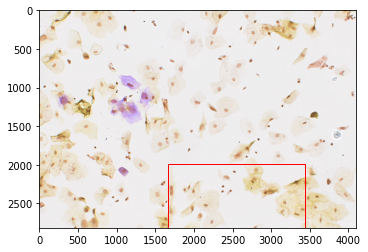

In [8]:
img = cv2.imread(img_list[1])
bbox = sparse_result
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
rect = plt.Rectangle((1.6611130e+03, 1.9927274e+03), 1.7818225e+03, 2.5277417e+03, fill=False, edgecolor = 'red',linewidth=1)
ax.add_patch(rect)
plt.imshow(img) # 图像数组
plt.show()